In [14]:
import pandas as pd
import shap
import sklearn
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('LFS_Data.csv')

In [3]:
df = df.drop(columns=['reg_name', 'cwt_name', 'cwt'])

In [4]:
df

,year,reg,gpp,members,sex,age,marital,edu,occup,status,work_hr,weight,salary
0,2013,2,60502,1,1,59,2,12,12,5,35,85.4958,99970
1,2013,2,226173,5,1,52,2,3,54,6,70,423.2613,99000
2,2013,2,174854,4,1,55,2,16,21,5,35,480.9394,98000
3,2013,3,60093,4,1,59,2,18,12,5,24,65.5107,97000
4,2013,1,481118,3,2,28,2,12,93,6,48,512.5734,96000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148799,2015,5,55601,5,1,25,2,3,52,6,30,99.8435,2700
148800,2015,5,55601,3,1,41,2,3,61,6,24,231.4722,2700
148801,2015,5,103220,3,2,26,2,9,72,6,42,87.5258,2650
148802,2015,3,82899,1,2,59,3,3,61,6,42,197.9502,2640


In [5]:
y = df.loc[:, 'salary']
y

0         99970
1         99000
2         98000
3         97000
4         96000
          ...  
148799     2700
148800     2700
148801     2650
148802     2640
148803     2640
Name: salary, Length: 148804, dtype: int64

In [6]:
Weight = df.loc[:, 'weight']
Weight

0          85.4958
1         423.2613
2         480.9394
3          65.5107
4         512.5734
            ...   
148799     99.8435
148800    231.4722
148801     87.5258
148802    197.9502
148803    313.6017
Name: weight, Length: 148804, dtype: float64

In [7]:
X = df.drop(['salary','weight'], axis=1)
X

,year,reg,gpp,members,sex,age,marital,edu,occup,status,work_hr
0,2013,2,60502,1,1,59,2,12,12,5,35
1,2013,2,226173,5,1,52,2,3,54,6,70
2,2013,2,174854,4,1,55,2,16,21,5,35
3,2013,3,60093,4,1,59,2,18,12,5,24
4,2013,1,481118,3,2,28,2,12,93,6,48
...,...,...,...,...,...,...,...,...,...,...,...
148799,2015,5,55601,5,1,25,2,3,52,6,30
148800,2015,5,55601,3,1,41,2,3,61,6,24
148801,2015,5,103220,3,2,26,2,9,72,6,42
148802,2015,3,82899,1,2,59,3,3,61,6,42


In [8]:
X.dtypes

year       int64
reg        int64
gpp        int64
members    int64
sex        int64
age        int64
marital    int64
edu        int64
occup      int64
status     int64
work_hr    int64
dtype: object

In [9]:
# fit linear model to the data

model = sklearn.linear_model.LinearRegression().fit(X, y, sample_weight=Weight)
model

LinearRegression()

In [10]:
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", model.coef_[i].round(4))

Model coefficients:

year = 373.7441
reg = -595.0765
gpp = 0.0057
members = -102.5946
sex = -1632.9005
age = 240.4017
marital = -125.7013
edu = 828.0748
occup = -99.058
status = -178.3182
work_hr = 0.3007


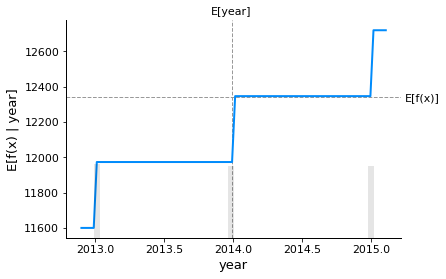

In [21]:
# make a Partial Dependence Plot (PDP)

shap.plots.partial_dependence(
    "year", model.predict, data=X,
    model_expected_value=True, feature_expected_value=True, ice=False
    )

In [ ]:
# make an Individual Conditional Expectation Plot (ICE)

shap.plots.partial_dependence(
    "reg", model.predict, data=X,
    model_expected_value=True, feature_expected_value=True, ice=True
    )

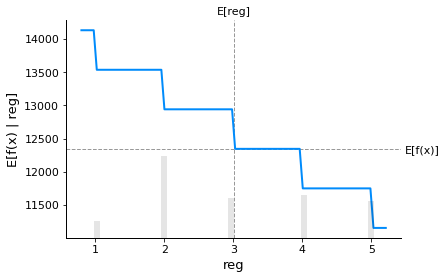

In [ ]:
# make a Partial Dependence Plot (PDP)

shap.plots.partial_dependence(
    "reg", model.predict, data=X,
    model_expected_value=True, feature_expected_value=True, ice=False
    )

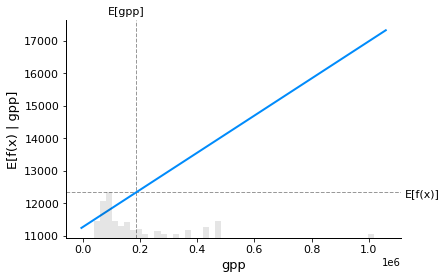

In [ ]:
# make a Partial Dependence Plot (PDP)

shap.plots.partial_dependence(
    "gpp", model.predict, data=X,
    model_expected_value=True, feature_expected_value=True, ice=False
    )

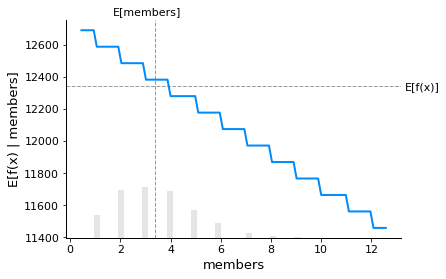

In [ ]:
# make a Partial Dependence Plot (PDP)

shap.plots.partial_dependence(
    "members", model.predict, data=X,
    model_expected_value=True, feature_expected_value=True, ice=False
    )

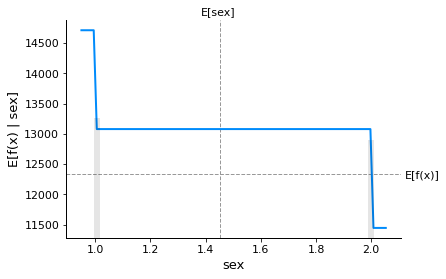

In [ ]:
# make a Partial Dependence Plot (PDP)

shap.plots.partial_dependence(
    "sex", model.predict, data=X,
    model_expected_value=True, feature_expected_value=True, ice=False
    )

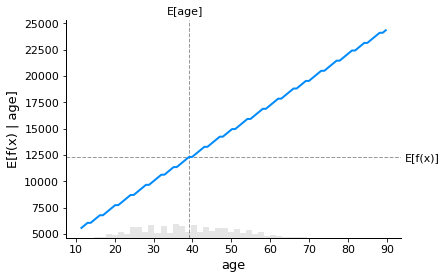

In [ ]:
# make a Partial Dependence Plot (PDP)

shap.plots.partial_dependence(
    "age", model.predict, data=X,
    model_expected_value=True, feature_expected_value=True, ice=False
    )

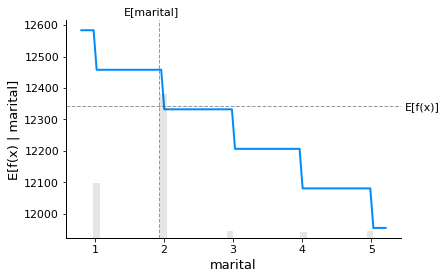

In [ ]:
# make a Partial Dependence Plot (PDP)

shap.plots.partial_dependence(
    "marital", model.predict, data=X,
    model_expected_value=True, feature_expected_value=True, ice=False
    )

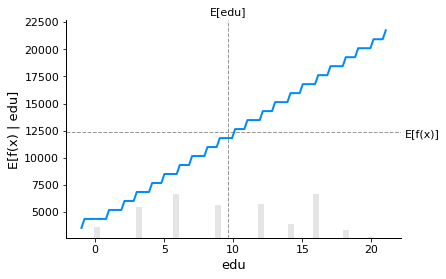

In [ ]:
# make a Partial Dependence Plot (PDP)

shap.plots.partial_dependence(
    "edu", model.predict, data=X,
    model_expected_value=True, feature_expected_value=True, ice=False
    )

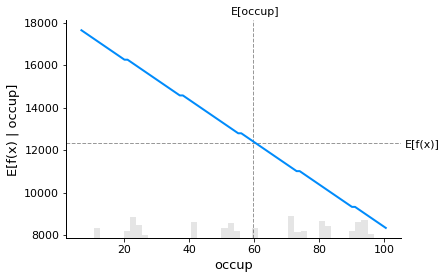

In [ ]:
# make a Partial Dependence Plot (PDP)

shap.plots.partial_dependence(
    "occup", model.predict, data=X,
    model_expected_value=True, feature_expected_value=True, ice=False
    )

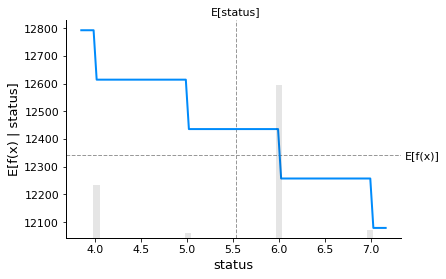

In [ ]:
# make a Partial Dependence Plot (PDP)

shap.plots.partial_dependence(
    "status", model.predict, data=X,
    model_expected_value=True, feature_expected_value=True, ice=False
    )

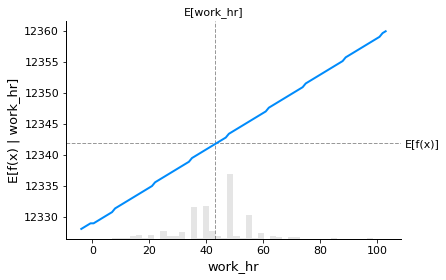

In [ ]:
# make a Partial Dependence Plot (PDP)

shap.plots.partial_dependence(
    "work_hr", model.predict, data=X,
    model_expected_value=True, feature_expected_value=True, ice=False
    )

In [ ]:
# explain linear model with SHAP

explainer = shap.Explainer(model, masker=shap.maskers.Independent(X))
shap_values = explainer(X)

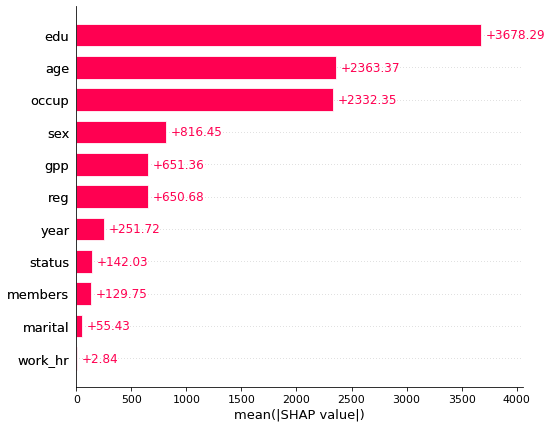

In [ ]:
# mean absolute value of each feature over all the instances of the dataset

shap.plots.bar(shap_values.abs.mean(0), max_display=11)

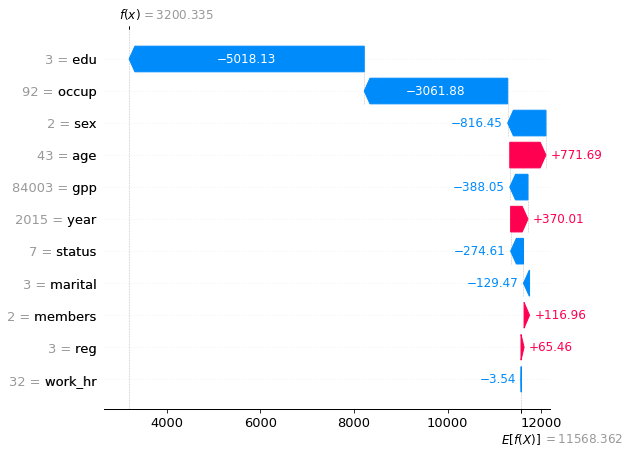

In [ ]:
# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
sample_ind = 148006
shap.plots.waterfall(shap_values[sample_ind], max_display=11)